In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS
import numpy as np

In [2]:
df = pd.read_stata("MROZ.dta")
df.head(2)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25


#### a)

In [3]:
reg = smf.ols('lwage ~ exper + expersq + educ + age + kidslt6 + kidsge6', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     13.19
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.06e-13
Time:                        16:30:35   Log-Likelihood:                -431.24
No. Observations:                 428   AIC:                             876.5
Df Residuals:                     421   BIC:                             904.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4209      0.317     -1.328      0.1

#### b)

In [4]:
print(reg.f_test('age=0 , kidslt6=0,  kidsge6=0'))

<F test: F=0.2370238595285256, p=0.8705394717167727, df_denom=421, df_num=3>


#### C)

AIC y BIC dan mas chicos -> mejor modelo

In [5]:
reg = smf.ols('lwage ~ exper + expersq + educ', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     26.29
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.30e-15
Time:                        16:30:35   Log-Likelihood:                -431.60
No. Observations:                 428   AIC:                             871.2
Df Residuals:                     424   BIC:                             887.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5220      0.199     -2.628      0.0

#### d)

La derivada parcial del salario en puntos porcentuales respecto de los años de exp es: 0.0416 + 2*-0.0008*exper.

Nos piden un cambio de exper=4 a exper=6, así que queda: 0.0416*(6−4) + (−0.0008)*(6²−4²) = 0.0672

Es decir, aumenta en un 6.72% seteris paribus.

ES DECIR: esto cambia en función del delta de años y del valor absoluto de esos dos valores de años.

In [6]:
print('Aumento de 4 a 6 años: ', 0.0416*(6-4) + (-0.0008)*(6**2-4**2))
print('Aumento de 4 a 5 años: ', 0.0416*(5-4) + (-0.0008)*(5**2-4**2))

Aumento de 4 a 6 años:  0.0672
Aumento de 4 a 5 años:  0.0344


In [7]:
# lo mismo, pero en otro lugar de X
print('Aumento de 14 a 16 años: ', 0.0416*(16-14) + (-0.0008)*(16**2-14**2))
print('Aumento de 14 a 15 años: ', 0.0416*(15-14) + (-0.0008)*(15**2-14**2))

Aumento de 14 a 16 años:  0.035199999999999995
Aumento de 14 a 15 años:  0.018399999999999996


#### e)
Por cada año que aumenta educ, la probabilidad de inlf aumenta 3.98%, seteris paribus.

In [8]:
reg = smf.ols('inlf ~ nwifeinc + educ + exper + expersq + age + kidslt6 + kidsge6', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           6.90e-46
Time:                        16:30:35   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5855      0.154      3.798      0.0

### f)

In [9]:
y = df['inlf']
X = df[['nwifeinc', 'educ', 'exper', 'expersq', 'age', 'kidslt6', 'kidsge6']]
X = sm.add_constant(X)

probit_mod = sm.Probit(y, X)
probit_res = probit_mod.fit()
print(probit_res.summary())

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Aug 2025   Pseudo R-squ.:                  0.2206
Time:                        16:30:35   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 2.009e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2701      0.509      0.531      0.595      -0.727       1.267
nwifeinc      -0.0120      0.

# 2) VAR

In [10]:
import pandas as pd
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS

In [11]:
df = pd.read_stata("../Precios_y_Dinero_data.dta")
df.head(3)

,mmyy,ipc,m,m_en_ars
0,Jan-03,100.00,100.00,29609.92
1,Feb-03,100.57,99.36,29420.37
2,Mar-03,101.16,102.63,30388.08


Además, vamos a generar un índice asociado al período mensual correspondiente, para eso construímos la columna `period`.

In [12]:
inicio = pd.to_datetime(df['mmyy'].iloc[0], format='%b-%y').strftime('%Y-%m')
df["yearmm"] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("yearmm")
df['ipc'] = df['ipc'].astype(float)
df['m'] = df['m'].astype(float)
df.head()

,mmyy,ipc,m,m_en_ars
yearmm,,,,
2003-01,Jan-03,100.00,100.00,29609.92
2003-02,Feb-03,100.57,99.36,29420.37
2003-03,Mar-03,101.16,102.63,30388.08
2003-04,Apr-03,101.21,104.26,30870.99
2003-05,May-03,100.82,111.80,33105.17


Generamos las variables Inflación y Tasa de Crecimiento de la Base Monetaria

In [13]:
df["infl"] = df["ipc"] / df["ipc"].shift(1) - 1
df["crec_m"] = df["m"] / df["m"].shift(1) - 1
df = df[['infl','crec_m']]

#### Chequeo de estacionariedad utilizando la prueba de Dickey-Fuller GLS

Debemos corrobar que sean estacionarias. Para eso tenemos diferentes alternativas, acorde con lo visto en clase vamos a utilizar una biblioteca (`arch`) que desarrolla la prueba de Dickey-Fuller GLS (Elliott-Rothenberg-Stock) en línea con el uso del comando `dfgls` de Stata.

Inflacion: estacionaria

<Axes: title={'center': 'Inflación'}, xlabel='yearmm'>

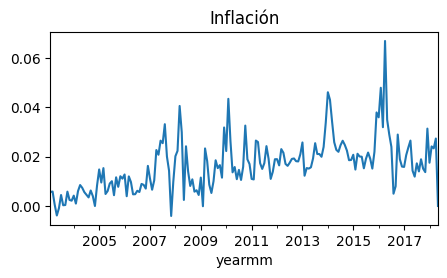

In [14]:
df["infl"].dropna().plot(title="Inflación", figsize=(5, 2.5))

In [15]:
test = DFGLS(df["infl"].dropna(), trend="c")
print("Inflación")
print(test.summary())

Inflación
      Dickey-Fuller GLS Results      
Test Statistic                 -3.295
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.74 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Crecimiento de la Base Monetaria: NO estacionaria. Me suena que esto no era grave (caso 2: lambda1<1 y lambda2=1). Pero no me acuerdo si había que hacer algo para correjirlo.

<Axes: title={'center': 'Tasa de Crecimiento de la Base Monetaria'}, xlabel='yearmm'>

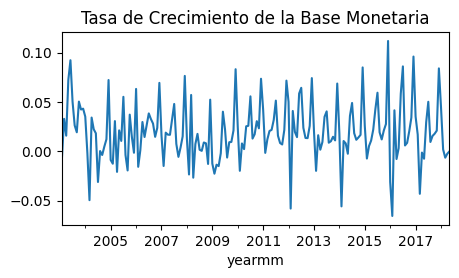

In [16]:
df["crec_m"].dropna().plot(title="Tasa de Crecimiento de la Base Monetaria", figsize=(5, 2.5))

In [17]:
test = DFGLS(df["crec_m"].dropna(), trend="c")
print("Tasa de Crecimiento de la Base Monetaria")
print(test.summary())

Tasa de Crecimiento de la Base Monetaria
      Dickey-Fuller GLS Results      
Test Statistic                 -1.174
P-value                         0.227
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.75 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Corremos el VAR(2) bivariado

In [18]:
model = VAR(df[["infl", "crec_m"]].dropna())
result_var2 = model.fit(2)
print(result_var2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Aug, 2025
Time:                     16:30:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.6022
Nobs:                     182.000    HQIC:                  -16.7069
Log likelihood:           1020.33    FPE:                5.16789e-08
AIC:                     -16.7782    Det(Omega_mle):     4.89523e-08
--------------------------------------------------------------------
Results for equation infl
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004224         0.001340            3.151           0.002
L1.infl           0.517731         0.075813            6.829           0.000
L1.crec_m         0.020715         0.020682            1.002           0.317


In [19]:
# Selection Order Criteria
max_lags = len(df[["infl", "crec_m"]].dropna())-125
max_lags = 36
print(max_lags)
print(model.select_order(maxlags=max_lags).summary())

36
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.28      -16.24   8.495e-08      -16.26
1       -16.64     -16.52*   5.939e-08      -16.59
2       -16.69      -16.49   5.632e-08     -16.61*
3       -16.72      -16.44   5.485e-08      -16.60
4       -16.73      -16.36   5.437e-08      -16.58
5       -16.71      -16.27   5.525e-08      -16.53
6       -16.71      -16.18   5.552e-08      -16.49
7       -16.71      -16.10   5.536e-08      -16.46
8       -16.69      -16.00   5.653e-08      -16.41
9       -16.65      -15.88   5.885e-08      -16.34
10      -16.76      -15.91   5.275e-08      -16.42
11      -16.76      -15.83   5.286e-08      -16.38
12      -17.01      -16.00   4.129e-08      -16.60
13      -17.02      -15.93  4.097e-08*      -16.57
14      -16.98      -15.81   4.266e-08      -16.50
15      -16.98      -15.72   4.281e-08      -16.47
16      -16.97      -15.63  

#### VAR(n) bivariado

In [20]:
selected_lag = 13
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Aug, 2025
Time:                     16:30:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.9800
Nobs:                     171.000    HQIC:                  -16.5695
Log likelihood:           1019.84    FPE:                4.27989e-08
AIC:                     -16.9721    Det(Omega_mle):     3.19223e-08
--------------------------------------------------------------------
Results for equation infl
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.002922         0.002082            1.403           0.161
L1.infl            0.488500         0.085379            5.722           0.000
L1.crec_m          0.011412         0.028064            0.407           0

### Estabilidad del VAR (chequeo que no haya raices unitarias)
es decir, que todas las raices sean > 1 en valor absoluto

In [21]:
roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estacionario.")

Raíces del VAR(13):


array([ 2.78943753e+02-0.j        ,  1.27130198e+00+0.41715393j,
        1.27130198e+00-0.41715393j, -5.00202805e-01+1.12212981j,
       -5.00202805e-01-1.12212981j, -8.12899955e-01-0.83131271j,
       -8.12899955e-01+0.83131271j,  8.03758244e-01+0.84014038j,
        8.03758244e-01-0.84014038j,  1.14622214e+00-0.j        ,
       -1.13280445e+00-0.j        , -1.07886026e+00+0.29282336j,
       -1.07886026e+00-0.29282336j,  2.62265041e-01+1.08492116j,
        2.62265041e-01-1.08492116j, -9.48832316e-01+0.56242934j,
       -9.48832316e-01-0.56242934j,  1.08637644e+00-0.j        ,
        9.54046014e-01-0.49194472j,  9.54046014e-01+0.49194472j,
       -5.60115322e-02-1.05572896j, -5.60115322e-02+1.05572896j,
       -5.15305119e-01+0.91002389j, -5.15305119e-01-0.91002389j,
        5.15158966e-01-0.87494769j,  5.15158966e-01+0.87494769j])

[278.94375331   1.33799332   1.33799332   1.22856752   1.22856752
   1.16270682   1.16270682   1.16269651   1.16269651   1.14622214
   1.13280445   1.1178931    1.1178931    1.11617063   1.11617063
   1.10300024   1.10300024   1.08637644   1.07341204   1.07341204
   1.05721376   1.05721376   1.04579293   1.04579293   1.0153434
   1.0153434 ]
El modelo VAR(13) es estacionario.


### Testeo si los residuos estan autocorrelacionados

In [22]:
wb = result_var.test_whiteness(nlags=max_lags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 36 is zero: fail to reject at 5% significance level. Test statistic: 105.868, critical value: 115.390>, p-value: 0.153>


### Testeo por Causalidad en Sentido de Granger

Con lags=13, hay causalidad en ambas direcciones.

In [23]:
print(result_var.test_causality("infl", ["crec_m"], kind="f"))

print(result_var.test_causality("crec_m", ["infl"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause infl: fail to reject at 5% significance level. Test statistic: 1.717, critical value: 1.754>, p-value: 0.057>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: infl does not Granger-cause crec_m: reject at 5% significance level. Test statistic: 1.782, critical value: 1.754>, p-value: 0.045>
